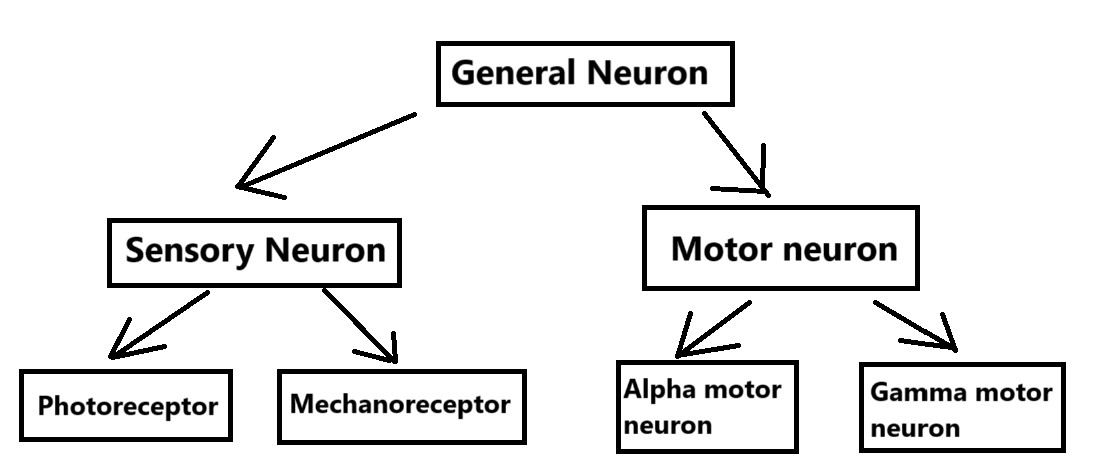

In [26]:
from IPython.display import Image, display

# Path to your image
image_path = "D:/New python/empy_python_package/neurons.jpg"

# Display the image
display(Image(filename=image_path))

In [ ]:
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate
    def activate(self, strength_of_stimulus):
        print ('Firing rate is ...')

class SensoryNeuron (GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type
    def sense_stimulus(self, type_of_stimulus):
        pass

class MotorNeuron (GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
    def control_muscle(self, activation_level_of_neuron):
        pass


class Photoreceptor (SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "Light")
    def light_detection(self, intensity_of_light):
        pass


class Mechanoreceptor (SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "Pressure")
    def pressure_detection(self, strength_of_pressure):
        pass


class AlphaMotorNeuron (MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "Skeletal muscle")
    def skeletal_muscle_control(self, level_of_activation):
        pass


class GammaMotorNeuron (MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "Muscle spindle")
    def muscle_spindle_control(self, activation_of_muscle_tone):
        pass

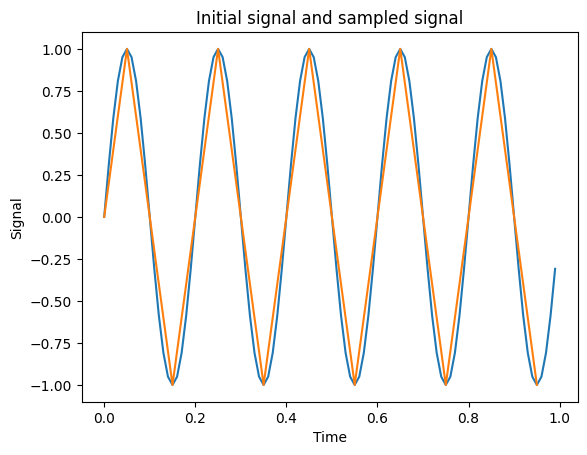

In [3]:
'''Part 2 Question 1'''
import numpy as np
import matplotlib.pyplot as plt

#initial conditions of sample
time = np.arange(0, 1, 0.01)
signal = np.sin(2 * np.pi * 5 * time)
def sampling_signal(signal): #defining function for sampling signal
    new_signal = [] #we make empty list for values of sampled signal
    for i in range(len(signal)):
        if signal[i] == max(signal) or signal[i] == min(signal) or i%5 == 0:
            new_signal.append(signal[i]) #we add maximal value or minimal value or every 5th value, because we need to reduce sample by 5 times
    sampled_signal = np.array(new_signal) #changing type of sampled signal
    return sampled_signal

sampled_signal = sampling_signal(signal)
new_time = np.arange(0, 1, 0.05)
#defining plots and labels
plt.plot(time, signal)
plt.plot(new_time, sampled_signal)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title("Initial signal and sampled signal")
plt.show()

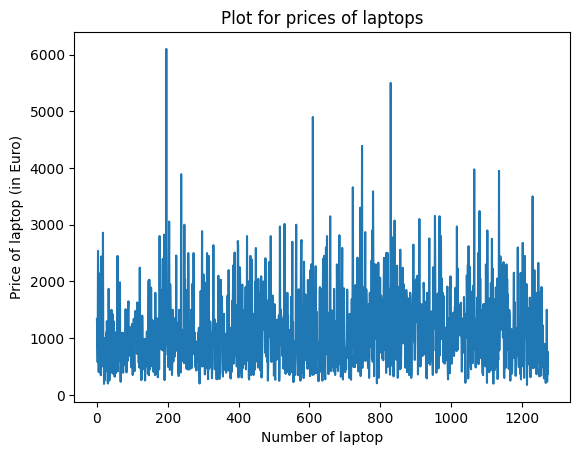

In [5]:
'''Question 2'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#downloading file and producing array on its base
file_path = 'C:/Users/Макс Бубашвили/Downloads/laptop_price - dataset.csv'
laptops_df = pd.read_csv(file_path)

'''Plot the price of all the laptops'''
prices = laptops_df['Price (Euro)']
plt.plot(prices)
plt.xlabel('Number of laptop')
plt.ylabel('Price of laptop (in Euro)')
plt.title('Plot for prices of laptops')
plt.show()

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
3346.1428571428573


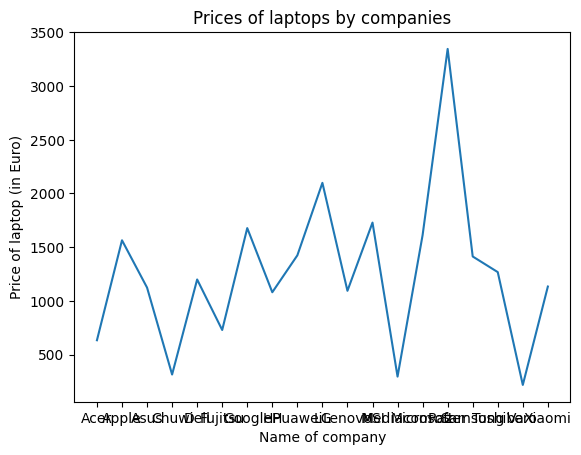

In [ ]:
'''Collecting laptops due to their company and counting average price for all laptops of each company'''
prices_for_companies = laptops_df.groupby('Company')['Price (Euro)'].mean()
print(prices_for_companies)
m = max(prices_for_companies)
print(m)
best = prices_for_companies.index.tolist()
plt.plot(prices_for_companies)
plt.xlabel('Name of company')
plt.ylabel('Price of laptop (in Euro)')
plt.title('Prices of laptops by companies')
plt.show()


In [8]:
'''Changing names of OpSys in one style and uploading this data to initial file'''
print(laptops_df.OpSys.unique())
systems = laptops_df["OpSys"]
systems = systems.replace({'macOS': 'MacOS'})
systems = systems.replace({'Mac OS X': 'MacOS'})
systems = systems.replace({'Windows 10': 'Windows'})
systems = systems.replace({'Windows 10 S': 'Windows'})
systems = systems.replace({'Windows 7': 'Windows'})
laptops_df['Systems'] = systems
laptops_df.to_csv('C:/Users/Макс Бубашвили/Downloads/laptop_price - dataset.csv', index=False)


['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


['MacOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


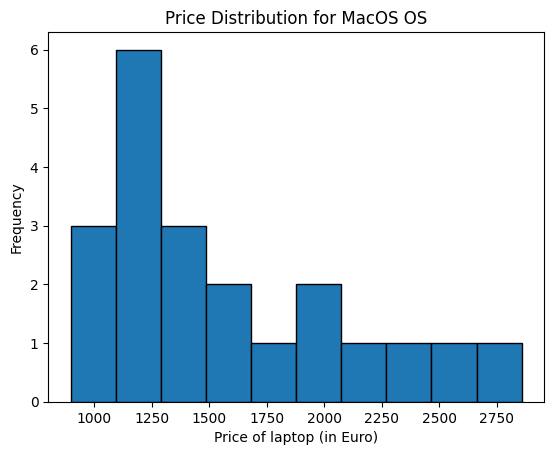

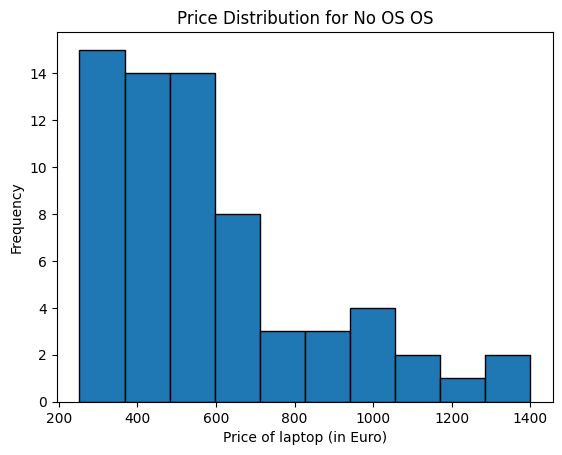

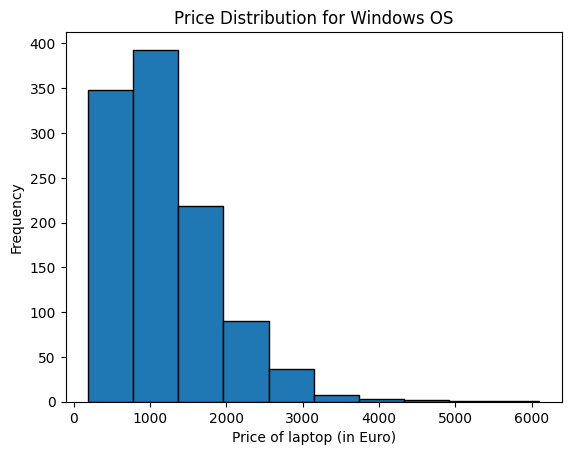

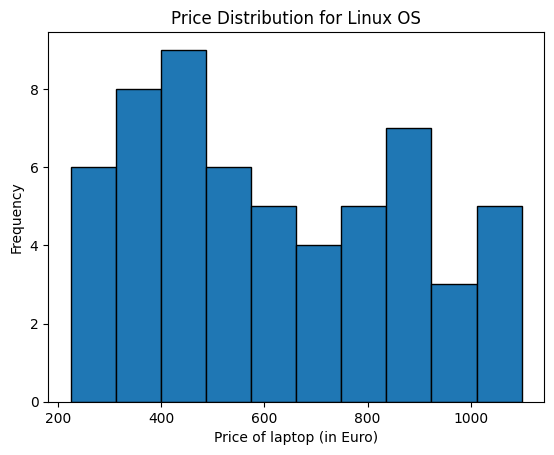

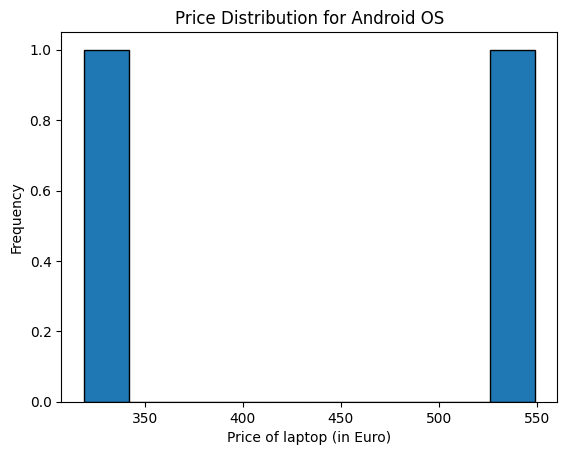

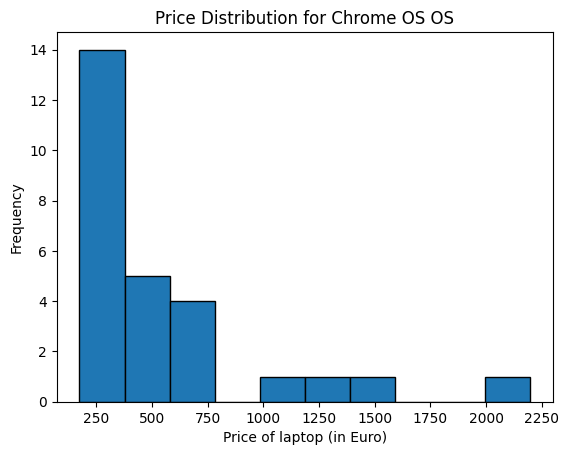

In [9]:
'''By using "for" cycle painting plot for each type of OpSys '''
unique_systems = systems.unique()
print(unique_systems)
for i in unique_systems:
    systems_data = laptops_df[laptops_df['Systems'] == i]
    plt.hist(systems_data['Price (Euro)'], edgecolor='black')
    plt.title(f"Price Distribution for {i} OS")
    plt.xlabel("Price of laptop (in Euro)")
    plt.ylabel("Frequency")
    plt.show()


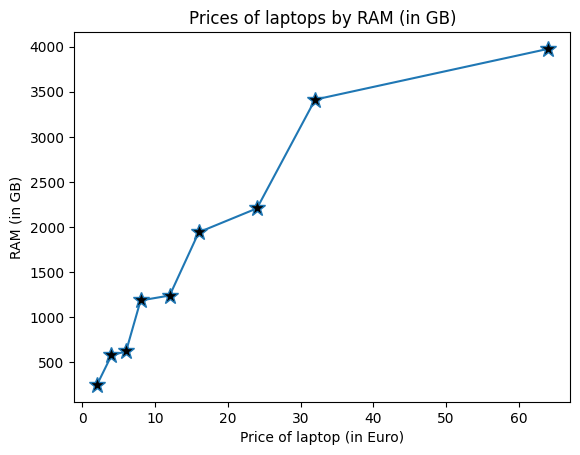

In [10]:
'''Collecting laptops due to their RAM and counting average price for all laptops of each company'''
rams = laptops_df["RAM (GB)"].unique()
prices_for_rams = laptops_df.groupby('RAM (GB)')['Price (Euro)'].mean()
plt.plot(prices_for_rams, marker='*', markerfacecolor='black', markersize=12)
plt.xlabel('Price of laptop (in Euro)')
plt.ylabel('RAM (in GB)')
plt.title('Prices of laptops by RAM (in GB)')
plt.show()

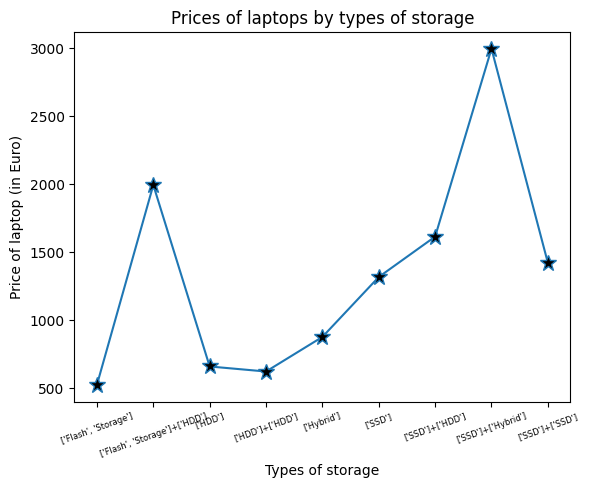

In [11]:
'''Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory"'''
memories = laptops_df['Memory']
storage_type = []
for i in range(len(memories)): #in this cycle we splice out information about storage type on base of location of these words in string
    if '+' in memories[i]:
        if 'Flash' in memories[i]:
            x = str(memories[i].split()[1:3]) + '+' + str(memories[i].split()[5:])
            storage_type.append(x)
        elif 'Flash' not in memories[i]:
            x = str(memories[i].split()[1:2]) + '+' + str(memories[i].split()[4:])
            storage_type.append(str(x))
    else:
        if 'Flash' in memories[i]:
            storage_type.append(str(memories[i].split()[1:]))
        else: storage_type.append(str(memories[i].split()[1:2]))
laptops_df['Storage Type'] = storage_type
laptops_df.to_csv('C:/Users/Макс Бубашвили/Downloads/laptop_price - dataset.csv', index=False) #uploading info about storage type to initial file with creatung a new column
types_of_storage = laptops_df.groupby('Storage Type')['Price (Euro)'].mean() #Collecting laptops due to their storage type and counting average price for all laptops of each company
plt.plot(types_of_storage, marker='*', markerfacecolor='black', markersize=12)
plt.xlabel('Types of storage')
plt.xticks(rotation=20, fontsize=6)
plt.ylabel('Price of laptop (in Euro)')
plt.title('Prices of laptops by types of storage')
plt.show()

['Intel', 'Nvidia', 'AMD', 'ARM']


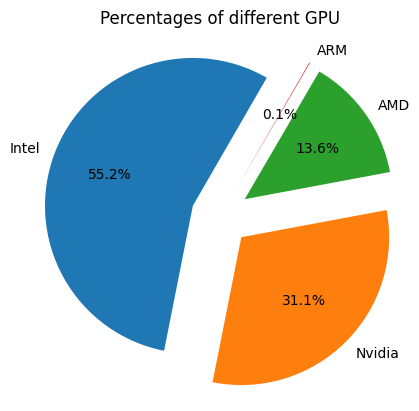

In [ ]:
'''Bonus question 1 - what is the percent of each GPU company? (pie chart)'''
gpu = laptops_df["GPU_Company"].value_counts()
borders = [0.2, 0.2, 0.2, 0.2]
gpu_labels = laptops_df["GPU_Company"].value_counts().index.tolist()
print(gpu_labels)
fig, ax = plt.subplots()
ax.pie(gpu, labels=gpu_labels, explode=borders, autopct='%1.1f%%', startangle=60)
plt.title('Percentages of different GPU')
plt.show()

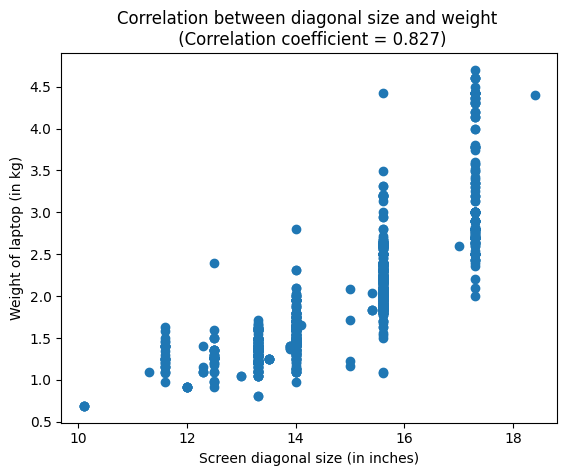

In [13]:
'''Bonus Question 2 - Is there correlation between size and weight of laptops?'''
size = laptops_df["Inches"]
weight = laptops_df["Weight (kg)"]
correlation = size.corr(weight).round(3)
plt.scatter(size, weight)
plt.xlabel('Screen diagonal size (in inches)')
plt.ylabel('Weight of laptop (in kg)')
plt.title(f"Correlation between diagonal size and weight \n (Correlation coefficient = {correlation})")
plt.show()